# **Title: Datafun-06-eda**

### **Author: Westley Vance**

### **Date: 6/3/24**

### Purpose: Project 6 uses a combination of Python and Markdown to create an initial data story in a Jupyter Notebook. This project will look at data from the titanic data set that is built into seaborn.


## **Project**
### Imports:
##### The following code provides the imports for the project.

In [155]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


### Loading the data set:
##### This loads the titanic data set and stores it as titanic_df. It then prints the head for the data set which consists of the first five entries from each column. Aftet that, we output the shape, datatypes, and basic statistics.
##### The data set is also saved as a CSV for future use.

In [156]:

# Load the Titanic dataset
titanic_df = sns.load_dataset('titanic')

# Display the first few rows of the dataset, the shape, the datatypes, and the basic statistics.
print(titanic_df.head())
print(titanic_df.shape)
print(titanic_df.dtypes)
print(titanic_df.describe())


#downloaded data set as .csv
titanic_df.to_csv('titanic.csv', index=False)


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
(891, 15)
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          ca

### Bar Graph of Age:
##### Produces a bar graph of the age distribution. From the graph, we can see the a majority of passengers were in their 20s and 30s with an average age of 29.7 years. We can aslo see from the quartiles that 50% of the passengers were between the ages of 20 and 38 making this a fairly young passenger manafest. 

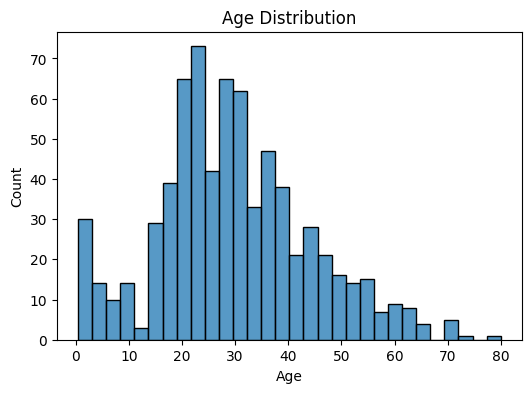

Average Age: 29.70
Q1: 20.125
Q3: 38.0


In [157]:
# Bar graph of the age distribution
plt.figure(figsize=(6, 4))
sns.histplot(titanic_df['age'].dropna(), bins=30, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print(f'Average Age: {titanic_df.age.mean():.2f}')
print(f'Q1: {titanic_df.age.quantile(.25)}')
print(f'Q3: {titanic_df.age.quantile(.75)}')

### Bar Graph of Sex:
##### Produces a bar graph representing the breakdown of sexes. From the graph, we can see that 65% of passengers were male with 35% being female. This will be something to keep in mind when we look at the ratios of male and female deaths.

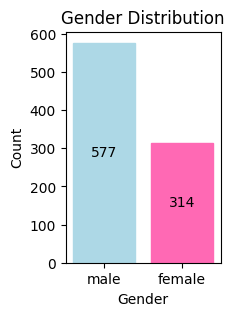

Percent male: 65%
Percent female: 35%


In [158]:
# Bar graph of the gender distribution
plt.figure(figsize=(2, 3))
ax = sns.countplot(data=titanic_df, x='sex')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Adding values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha = 'center', va = 'center', 
                xytext = (0, 0), 
                textcoords = 'offset points')

# Assigns bar colors
colors = ['lightblue', 'hotpink']
for bar, color in zip(ax.patches, colors):
    bar.set_color(color)

plt.show()
print(f'Percent male: {round((577/(577+314)*100))}%')
print(f'Percent female: {round((314/(577+314))*100)}%')

### Survival Rate by Gender:
##### This produces a bar graph of both male and female survival rates. We see the number of male and female dead. We can see that 81% of males dies where as only 26% of females died. This does not seem to match our breakdown of passengers by gender.

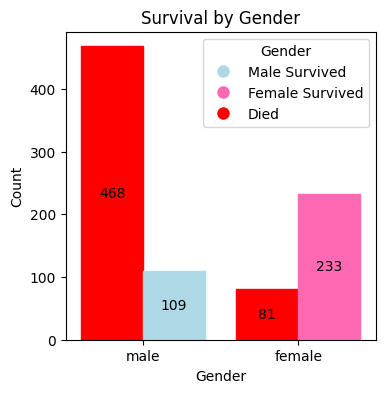

Percent male Death: 81%
Percent female Death: 26%


In [159]:
# Bar graph of survivors by gender
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=titanic_df, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Adding values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha = 'center', va = 'center', 
                xytext = (0, 0), 
                textcoords = 'offset points')

# Assigns bar colors
colors = ['red', 'red','lightblue', 'hotpink']
for bar, color in zip(ax.patches, colors):
    bar.set_color(color)

# Change legend colors
colors = ['lightblue', 'hotpink', 'red']
legend_labels = ['Male Survived', 'Female Survived', 'Died']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
ax.legend(handles, legend_labels, title='Gender')

plt.show()

print(f'Percent male Death: {round((468/(577)*100))}%')
print(f'Percent female Death: {round((81/(314))*100)}%')


### Survival Rate by Class:
##### This produces a bar graph of survivals and deaths for each passenger class. From the graph we can clearly see that it was not good for your health to be a third class passenger. 1st class passengers had a 63% survival rating, 2nd class passengers had a 47% survival rating, and third class passengers had an abismal 24% survival rating!

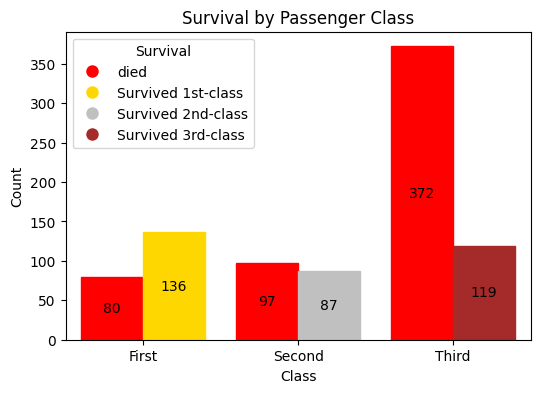

Percent Death 1st class: 37%
Percent Death 2nd class: 53%
Percent Death 3rd class: 76%


In [160]:
# Bar graph of class vs. survival
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=titanic_df, x='class', hue='survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Adding values on the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()/2), 
                ha='center', va='center', 
                xytext=(0, 0), 
                textcoords='offset points')

# Customize legend
colors = ['red', 'gold', 'silver', 'brown']
legend_labels =['died', 'Survived 1st-class', 'Survived 2nd-class','Survived 3rd-class']
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors]
ax.legend(handles, legend_labels, title='Survival')

# Assigns bar colors
colors = ['red', 'red', 'red', 'gold', 'silver', 'brown']
for bar, color in zip(ax.patches, colors):
    bar.set_color(color)

plt.show()

print(f'Percent Death 1st class: {round((80/(80+136)*100))}%')
print(f'Percent Death 2nd class: {round((97/(97+87))*100)}%')
print(f'Percent Death 3rd class: {round((372/(372+119))*100)}%')


### Survival Rate by Class and Gender:
##### This produces a bar graph of survivals and deaths for each passenger class and breaks that down further by gender. From the figure, we can see that it 'paid' to be a wealthy male. Punn intended! First class male passengers had a 3% death rate, where 3rd class male passengers had a 86% death rate. Ironically, the first class females did not fare as well. Their death rate was 63% with third class females having a 50% death rate. The folks that appear to have it almost as bad as the 3rd class males were the 2nd class women, coming in at a whopping 84% death rate.

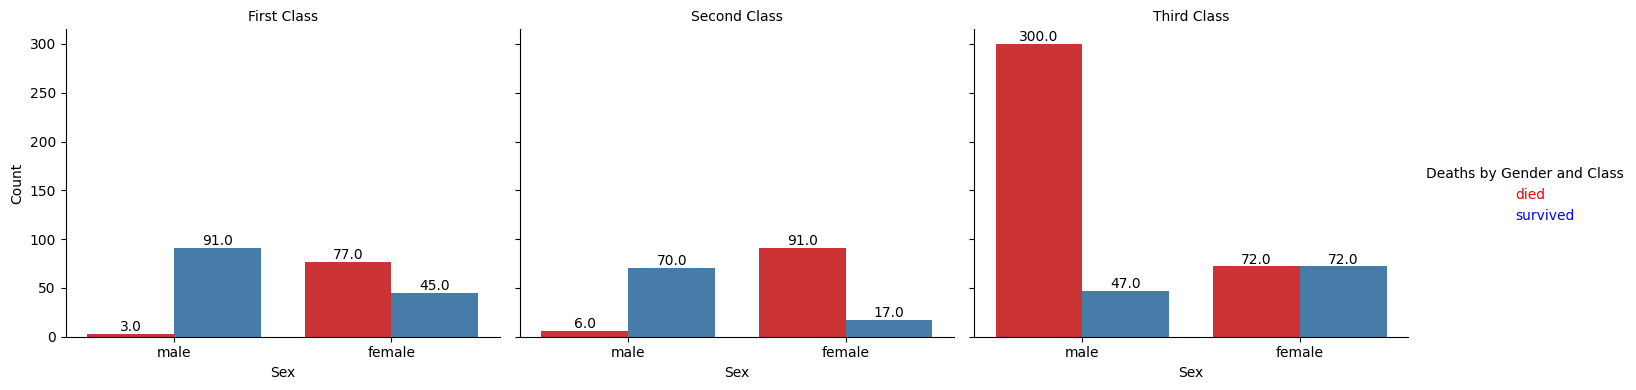

Percent Death 1st class Male: 3%
Percent Death 1st class Female: 63%
Percent Death 2nd class Male: 8%
Percent Death 2nd class Female: 84%
Percent Death 3rd class Male: 86%
Percent Death 3rd class Female: 50%


In [161]:
# Create a FacetGrid for the different classes
g = sns.FacetGrid(titanic_df, col='class', height=4, aspect=1.2)

# Create the bar plot on each facet
g.map_dataframe(sns.countplot, x='sex', hue='survived', palette='Set1')

# Add titles and labels
g.set_axis_labels("Sex", "Count")
g.add_legend(title='Deaths by Gender and Class', label_order=['died', 'survived'],labelcolor=['red', 'blue'])
g.set_titles(col_template="{col_name} Class")

# Add counts and percentages on the bars
for ax in g.axes.flat:
    for p in ax.patches:
        count = p.get_height()
        total = len(titanic_df[(titanic_df['class'] == ax.get_title().split()[0]) & (titanic_df['sex'] == p.get_x())])
        ax.annotate(f'{count}',
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

plt.show()

print(f'Percent Death 1st class Male: {round((3/(94)*100))}%')
print(f'Percent Death 1st class Female: {round((77/(122)*100))}%')
print(f'Percent Death 2nd class Male: {round((6/(76))*100)}%')
print(f'Percent Death 2nd class Female: {round((91/(108))*100)}%')
print(f'Percent Death 3rd class Male: {round((300/(347))*100)}%')
print(f'Percent Death 3rd class Female: {round((72/(144))*100)}%')


### Ticket price vs survival rate:
##### From the box-plot below we can see that survivors had higher ticket prices. The mean ticket price for surviving passengers was $26, and the mean ticket price for dead passengers was $10.50. Apparently the more you paid, the better your odds!

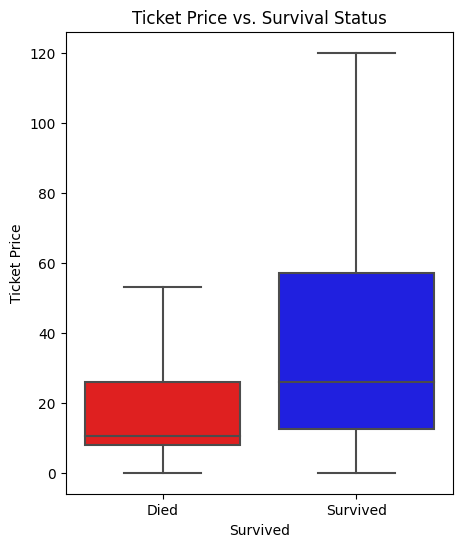

In [162]:
# Create the box plot
plt.figure(figsize=(5, 6))
sns.boxplot(data=titanic_df, x='survived', y='fare', showfliers=False, palette={0: 'red', 1: 'blue'})

# Add titles and labels
plt.title('Ticket Price vs. Survival Status')
plt.xlabel('Survived')
plt.ylabel('Ticket Price')
plt.xticks([0, 1], ['Died', 'Survived'])

plt.show()


In [163]:
# Filter the DataFrame for dead passengers
dead_passengers = titanic_df[titanic_df['survived'] == 0]
survived_passengers = titanic_df[titanic_df['survived'] == 1]
# Calculate the median ticket price for dead passengers
median_ticket_price_dead = dead_passengers['fare'].median()
median_ticket_price_survived = survived_passengers['fare'].median()

print(f"The median ticket price for dead passengers is: {median_ticket_price_dead:.2f}")
print(f"The median ticket price for surviving passengers is: {median_ticket_price_survived:.2f}")


The median ticket price for dead passengers is: 10.50
The median ticket price for surviving passengers is: 26.00


### Conclusion:
##### From the above information, we can see that it paid to be a wealthy man. Ohh how things haven't changed! If you were a Titanic passenger and wanted to hedge your bets on survival you could have taken a couple of different approaches. First, more money means less problems. Well technically the same problem, but I guess better results. Outside of that, be a female. Females had much better odds of survival than their male counterparts. Now, the caveat to this is the wealthy females. They did not fare very well. Who knows, maybe it was the big dresses, or maybe those wealthy first class men were just less chilverous than those poor dudes in 3rd class. If you wanted to live, you would not have wanted to be a male in the 3rd class!